In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
weather_api_key = "7cf1cb19bede2d69eb406e74d0893505"
query_url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q="


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [6]:
cities

['jamestown',
 'waddan',
 'qaanaaq',
 'rikitea',
 'grants',
 'bima',
 'avarua',
 'trincomalee',
 'kaitangata',
 'port moresby',
 'hofn',
 'vardo',
 'tasiilaq',
 'casper',
 'sarakhs',
 'novozavidovskiy',
 'saint-philippe',
 'alegrete',
 'severo-kurilsk',
 'mataura',
 'aksarka',
 'busselton',
 'stavyshche',
 'puerto escondido',
 'ancud',
 'kavaratti',
 'romanovo',
 'new norfolk',
 'puerto leguizamo',
 'nome',
 'juegang',
 'tezu',
 'ituni',
 'paamiut',
 'punta arenas',
 'linshu',
 'saleaula',
 'hermanus',
 'namibe',
 'la romana',
 'camargo',
 'butaritari',
 'sorvag',
 'sentyabrskiy',
 'hualmay',
 'luis correia',
 'ewa beach',
 'salto',
 'raudeberg',
 'hobart',
 'kruisfontein',
 'pahrump',
 'mahebourg',
 'hamilton',
 'hithadhoo',
 'albany',
 'pundaguitan',
 'mandera',
 'pevek',
 'warqla',
 'abbeville',
 'galveston',
 'ushuaia',
 'bilma',
 'sao filipe',
 'calbuco',
 'saint-augustin',
 'kang',
 'faanui',
 'port alfred',
 'suntar',
 'morant bay',
 'ilebo',
 'kloulklubed',
 'manduria',
 'luand

In [7]:
#API Calls
#Set up lists to contain data
city_names = []
cloudinesses = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []
countries = []



# start count
count_one = 0
set_one = 1

# loops for dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_names.append(city)
        else:
            count_one += 1
            city_names.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | waddan
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | grants
Processing Record 6 of Set 1 | bima
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | trincomalee
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | port moresby
Processing Record 11 of Set 1 | hofn
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | casper
Processing Record 15 of Set 1 | sarakhs
Processing Record 16 of Set 1 | novozavidovskiy
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | alegrete
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | aksarka
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | stavyshche
Processing Record 24 of Set 1 | puerto escondido
Processin

Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | ambilobe
Processing Record 41 of Set 4 | bilsanda
Processing Record 42 of Set 4 | linguere
Processing Record 43 of Set 4 | mzimba
Processing Record 44 of Set 4 | santa isabel do rio negro
Processing Record 45 of Set 4 | zhuhai
City not found. Skipping...
Processing Record 46 of Set 4 | destin
Processing Record 47 of Set 4 | arica
Processing Record 48 of Set 4 | thinadhoo
Processing Record 49 of Set 4 | norman wells
Processing Record 1 of Set 5 | waipawa
Processing Record 2 of Set 5 | suruc
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | kapaa
Processing Record 5 of Set 5 | severnoye
Processing Record 6 of Set 5 | vestmanna
Processing Record 7 of Set 5 | berezovyy
Processing Record 8 of Set 5 | mys shmidta
Processing Record 9 of Set 5 | kampot
City not found. Skipping...
Processing Record 10 of Set 5 | balkhash
City not found. Skipping...
Processing Record 11 of Set 5 | katsuura
Processing Recor

Processing Record 26 of Set 8 | borzya
Processing Record 27 of Set 8 | ahome
Processing Record 28 of Set 8 | vidor
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | rocha
Processing Record 31 of Set 8 | crotone
Processing Record 32 of Set 8 | ulaanbaatar
Processing Record 33 of Set 8 | shenjiamen
Processing Record 34 of Set 8 | uyovu
Processing Record 35 of Set 8 | kodarma
Processing Record 36 of Set 8 | berlin
Processing Record 37 of Set 8 | krasnogvardeyets
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 8 | lebyazhye
City not found. Skipping...
Processing Record 39 of Set 8 | sangar
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | konotop
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 8 | idah
Processing Record 44 of Set 8 | machilipatnam
Processing Record 45 of Set 8 | akranes
Processing Record 46 of Set 8 | alamosa
Proce

Processing Record 11 of Set 12 | saint-georges
Processing Record 12 of Set 12 | australind
City not found. Skipping...
Processing Record 13 of Set 12 | compostela
Processing Record 14 of Set 12 | sandwick
Processing Record 15 of Set 12 | port blair
Processing Record 16 of Set 12 | baherden
------------------------------
Data Retrieval Complete
------------------------------


In [8]:
#add dictionary
weather_dict = {
    "City":city_names,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":latitudes,
    "Lng":longitudes,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

#convert into dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,1,US,1579716774,62,42.10,-79.24,35.01,8.05
1,waddan,0,LY,1579716774,47,29.16,16.14,55.11,9.46
2,qaanaaq,1,GL,1579716774,51,77.48,-69.36,-11.87,7.61
3,rikitea,0,PF,1579716774,80,-23.12,-134.97,78.06,12.53
4,grants,75,US,1579716775,56,35.15,-107.85,42.80,13.87


In [14]:
weather_dataframe.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [15]:
#save to csv
weather_dataframe.to_csv(output_data_file)

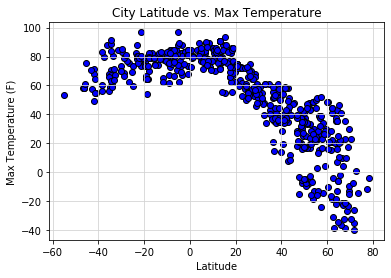

In [22]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_temp.png")
plt.show()

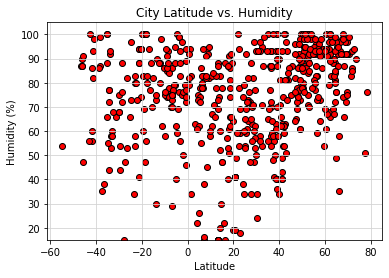

In [26]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_humitidy.png")
plt.show()

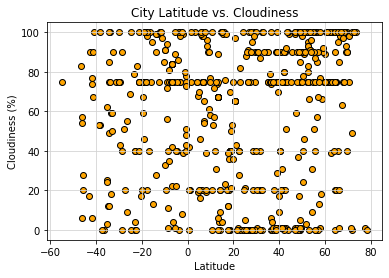

In [24]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_clouds.png")
plt.show()

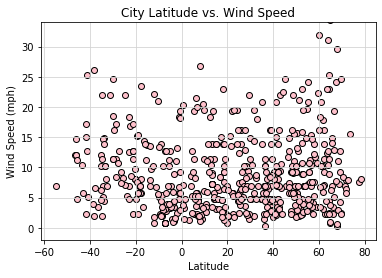

In [21]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="pink")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("lat_v_wind.png")
plt.show()

In [27]:
#Seperate Northern and Southern Hemisphere
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] >= 0]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] < 0]

The r-squared is : -0.86


Text(0, 0, 'y = -1.37x + 95.12')

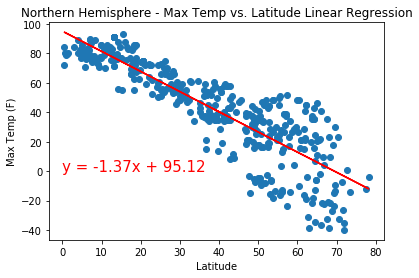

In [30]:
north_lat = northern_hemisphere["Lat"]
north_max = northern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

The r-squared is : 0.5


Text(-30, 50, 'y = 0.34x + 81.25')

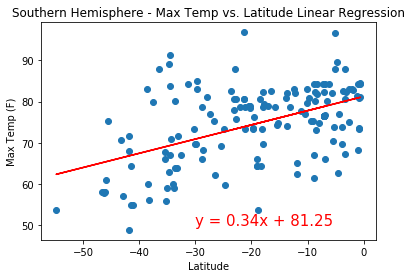

In [31]:
south_lat = southern_hemisphere["Lat"]
south_max = southern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

The r-squared is : 0.46


Text(40, 15, 'y = 0.53x + 52.8')

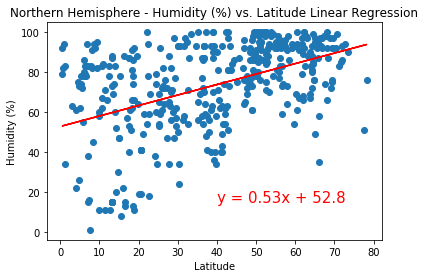

In [32]:

north_humidity = northern_hemisphere["Humidity"]
print(f"The r-squared is : {round(st.pearsonr(north_lat, north_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

The r-squared is : 0.11


Text(-40, 40, 'y = 0.15x + 77.85')

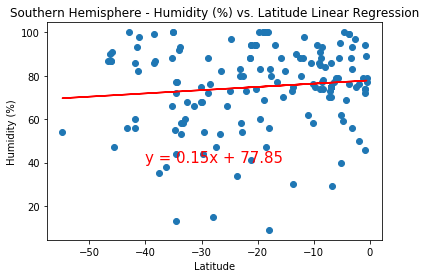

In [33]:
south_humidity = southern_hemisphere["Humidity"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

The r-squared is : 0.2


Text(40, 15, 'y = 0.36x + 44.6')

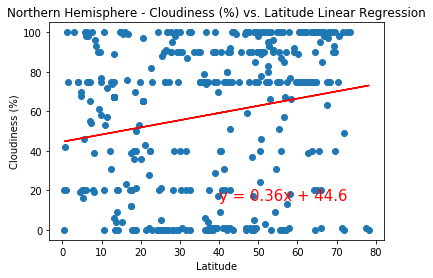

In [34]:
north_cloudiness = northern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_cloudiness)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

The r-squared is : 0.16


Text(-30, 30, 'y = 0.37x + 68.07')

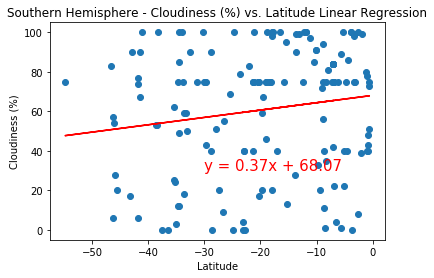

In [35]:
south_cloudiness = southern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_cloudiness)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

The r-squared is : 0.17


Text(50, 25, 'y = 0.06x + 6.58')

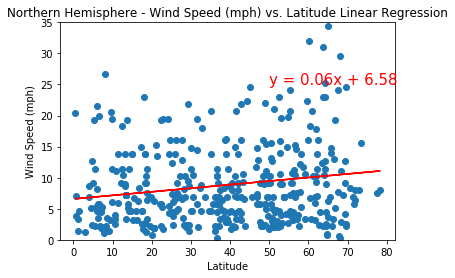

In [36]:
north_wind = northern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_wind)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

plt.ylim(0, 35)

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

The r-squared is : -0.3


Text(-30, 25, 'y = -0.13x + 6.3')

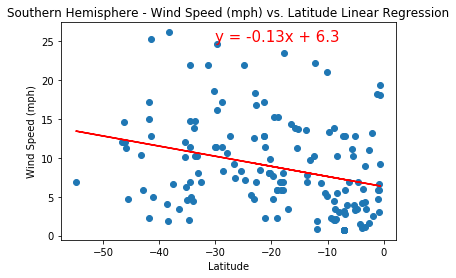

In [37]:
south_wind = southern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_wind)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")